In [1]:
import pandas as pd

In [2]:
import numpy as np

In [6]:
df = pd.read_excel("sales 2023-2024MO.xlsx")

In [10]:
df.head(100
)

Invoice number Invoice date  year  Customer number Customer name  \
0              746   2023-07-18  2023           100004        أمازون   
1              799   2023-08-13  2023           100004        أمازون   
2              366   2023-03-13  2023           100004        أمازون   
3              593   2023-09-11  2023           100004        أمازون   
4              537   2023-04-18  2023           100004        أمازون   
..             ...          ...   ...              ...           ...   
95            2314   2023-11-20  2023           100004        أمازون   
96             885   2023-09-12  2023           100004        أمازون   
97             366   2023-03-13  2023           100004        أمازون   
98             368   2023-03-13  2023           100004        أمازون   
99             885   2023-09-12  2023           100004        أمازون   

   trend_sales             Area Governorate                   City  \
0       online  القاهرة والجيزه       Cairo  Sixth of October City   
1       online  القاهرة والجيزه       Cairo             El Shorouk   
2       online  القاهرة والجيزه       Cairo             El Shorouk   
3       online  القاهرة والجيزه       Cairo             El Shorouk   
4       online  القاهرة والجيزه       Cairo             El Shorouk   
..         ...              ...         ...                    ...   
95      online  القاهرة والجيزه       Cairo             El Shorouk   
96      online  القاهرة والجيزه       Cairo             El Shorouk   
97      online  القاهرة والجيزه       Cairo             El Shorouk   
98      online  القاهرة والجيزه       Cairo             El Shorouk   
99      online  القاهرة والجيزه       Cairo             El Shorouk   

    Item number  ...     Item                                    size  \
0        601005  ...   SET(7)                       [P18+P20+P24+F24]   
1        601005  ...   SET(7)                       [P18+P20+P24+F24]   
2        601005  ...   SET(7)                       [P18+P20+P24+F24]   
3        601005  ...   SET(7)                       [P18+P20+P24+F24]   
4        601006  ...   SET(7)                       [P18+P20+P24+F24]   
..          ...  ...      ...                                     ...   
95       601102  ...  SET(14)  [P18+P20+P24+P28+F26+M16+Oo30+O30+G28]   
96       601104  ...  SET(10)               [P18+P20+P24+P28+O26+G28]   
97       601105  ...  SET(10)               [P18+P20+P24+P28+O26+G28]   
98       601105  ...  SET(10)               [P18+P20+P24+P28+O26+G28]   
99       601105  ...  SET(10)               [P18+P20+P24+P28+O26+G28]   

       shape     color            lid Sales amount discount         tax  \
0   circular     black  Stainless Lid      2171.05      NaN    303.9470   
1   circular     black  Stainless Lid      2171.05      NaN    303.9470   
2   circular     black  Stainless Lid      9671.06      NaN   1353.9484   
3   circular     black  Stainless Lid      2171.05      NaN    303.9470   
4   circular  Burgundy  Stainless Lid     11605.23      NaN   1624.7322   
..       ...       ...            ...          ...      ...         ...   
95  circular      gray  Stainless Lid     98684.20      NaN  13815.7880   
96  circular  Burgundy  Stainless Lid      3434.21      NaN    480.7894   
97  circular     black  Stainless Lid     22105.30      NaN   3094.7420   
98  circular     black  Stainless Lid     44210.60      NaN   6189.4840   
99  circular     black  Stainless Lid      3434.21      NaN    480.7894   

      Net sales  Net amount in local  
0     2474.9970            2474.9970  
1     2474.9970            2474.9970  
2    11025.0084           11025.0084  
3     2474.9970            2474.9970  
4    13229.9622           13229.9622  
..          ...                  ...  
95  112499.9880          112499.9880  
96    3914.9994            3914.9994  
97   25200.0420           25200.0420  
98   50400.0840           50400.0840  
99    3914.9994            3914.9994  

[100 rows x 22 columns]

In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [23]:
import pandas as pd

import matplotlib.pyplot as plt

file_path = "sales 2023-2024MO.xlsx"    
df = pd.read_excel("sales 2023-2024MO.xlsx")


In [24]:
df['Invoice date'] = pd.to_datetime(df['Invoice date'])

In [25]:
print(df.head(20))


    Invoice number Invoice date  year  Customer number Customer name  \
0              746   2023-07-18  2023           100004        أمازون   
1              799   2023-08-13  2023           100004        أمازون   
2              366   2023-03-13  2023           100004        أمازون   
3              593   2023-09-11  2023           100004        أمازون   
4              537   2023-04-18  2023           100004        أمازون   
5              116   2023-02-01  2023           100004        أمازون   
6              693   2023-06-14  2023           100004        أمازون   
7              885   2023-09-12  2023           100004        أمازون   
8              446   2023-03-27  2023           100004        أمازون   
9              885   2023-09-12  2023           100004        أمازون   
10             799   2023-08-13  2023           100004        أمازون   
11             746   2023-07-18  2023           100004        أمازون   
12             296   2023-03-01  2023           100004        أم

In [26]:
monthly_sales = df.groupby(df['Invoice date'].dt.to_period('M'))['Net sales'].sum().reset_index()

In [27]:
monthly_sales['Invoice date'] = monthly_sales['Invoice date'].dt.to_timestamp()

In [28]:
prophet_data = monthly_sales.rename(columns={'Invoice date': 'ds', 'Net sales': 'y'})

In [29]:
print(prophet_data.head())

          ds             y
0 2022-01-01  7.649188e+06
1 2022-02-01  5.078388e+06
2 2022-03-01  1.168398e+07
3 2022-04-01  1.329252e+06
4 2022-05-01  3.237467e+06


In [39]:
pip install prophet



  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/0a/2a/21b671feb22e708f4368518b8212a9d5993fc87385d14b0b195058114104/holidays-0.62-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed

In [40]:

from prophet import Prophet

# إنشاء نموذج Prophet
model = Prophet()

# تدريب النموذج على البيانات التاريخية
model.fit(prophet_data)

# إنشاء فترات مستقبلية لتغطية عام 2025 (12 شهرًا إضافية)
future = model.make_future_dataframe(periods=12, freq='M')  # إضافة 12 شهرًا
forecast = model.predict(future)

# عرض نتائج التنبؤ لعام 2025
forecast_2025 = forecast[forecast['ds'].dt.year == 2025]
print(forecast_2025[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


13:41:57 - cmdstanpy - INFO - Chain [1] start processing
13:41:58 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat    yhat_lower    yhat_upper
37 2025-01-31  2.546287e+07  1.936458e+07  3.230455e+07
38 2025-02-28  2.832177e+07  2.159328e+07  3.455760e+07
39 2025-03-31  2.482396e+07  1.844593e+07  3.133916e+07
40 2025-04-30  2.414927e+07  1.805633e+07  3.055520e+07
41 2025-05-31  2.490837e+07  1.817758e+07  3.148628e+07
42 2025-06-30  2.337747e+07  1.742538e+07  2.964435e+07
43 2025-07-31  2.899899e+07  2.269384e+07  3.551165e+07
44 2025-08-31  1.821339e+07  1.156080e+07  2.467414e+07
45 2025-09-30  2.319056e+07  1.710084e+07  2.961482e+07
46 2025-10-31  4.212603e+07  3.595732e+07  4.846431e+07
47 2025-11-30  4.155652e+07  3.485585e+07  4.796706e+07


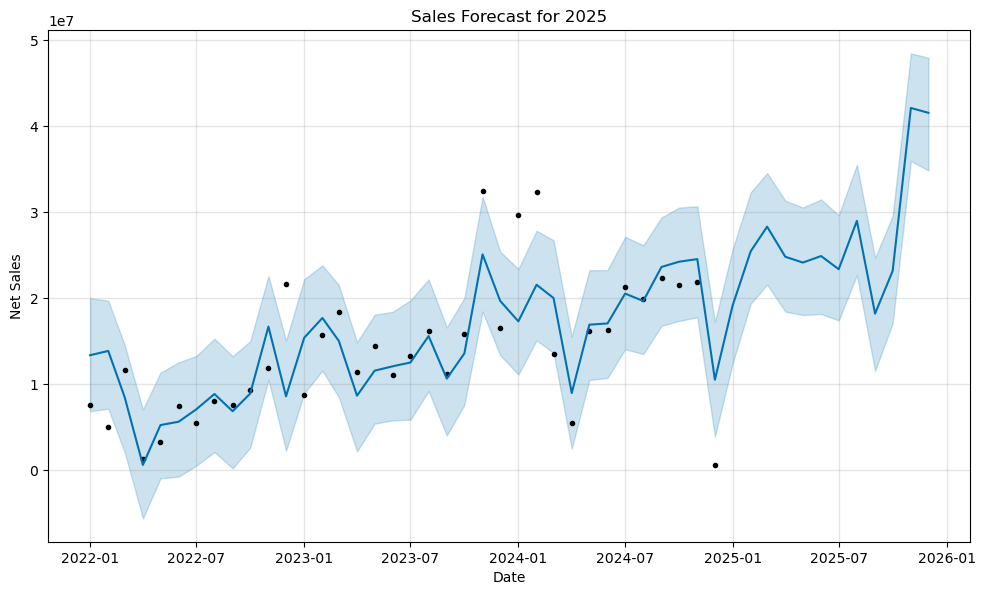

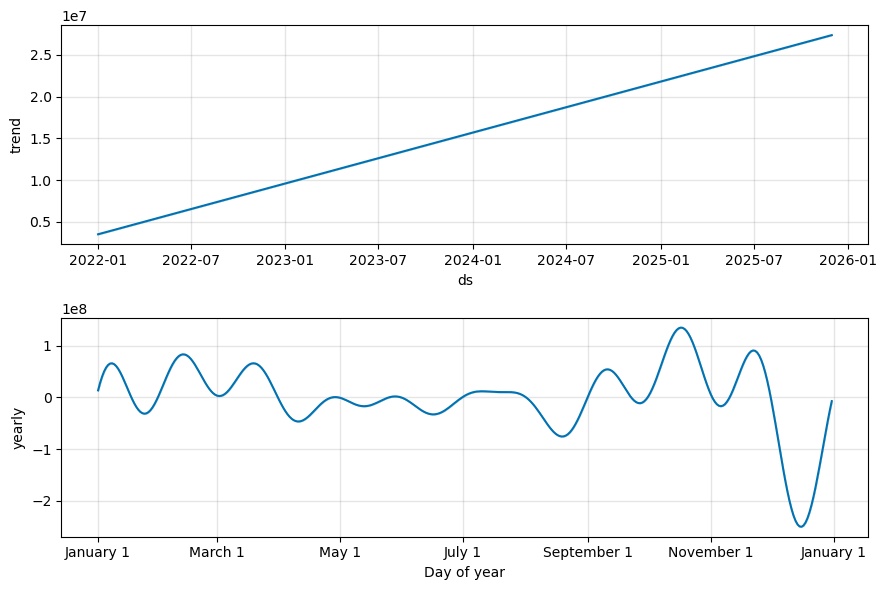

In [41]:
# رسم القيم الأصلية والتنبؤات
model.plot(forecast)
plt.title('Sales Forecast for 2025')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

# رسم المكونات (الاتجاه العام والموسمية)
model.plot_components(forecast)
plt.show()


In [42]:
pip install prophet


In [43]:
pip install fbprophet

     ---------------------------------------- 0.0/64.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/64.0 kB 330.3 kB/s eta 0:00:01
     ------------------------------ ------- 51.2/64.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 64.0/64.0 kB 578.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for Cython>=0.22 from https://files.pythonhosted.org/packages/fd/10/236fcc0306f85a2db1b8bc147aea714b66a2f27bac4d9e09e5b2c5d5dcca/Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy==0.9.5 from https://files.pythonhosted.org/packages/e3/e2/204c9c6beaf9e05ad28bd589c154afff35dffa6166d76841d3c0dec6c1e3/cmdstanpy-0.9.5-py3-none-any.whl.metadata
  Obtaining dependency information for pystan>=2.14 from https://files.pythonhosted.org/packages/3f/7f/657d722f81035931513a9760751a215f09fb1474c15c043b5a5ed17e61ca

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\moham\AppData\Local\Temp\pip-install-txiushki\pystan_fd9876bab12649f483bf1549df49d004\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [44]:
from prophet import Prophet


In [50]:
for item in items:
    # تحديد بيانات العنصر الحالي
    item_data = prophet_data[prophet_data['Item'] == item]
    

NameError: name 'items' is not defined

KeyError: 'Item'

In [52]:
if prophet_data.isnull().sum().any():
    print("Warning: The dataset contains missing values. Cleaning the data...")
    prophet_data = prophet_data.dropna()


In [53]:
items = prophet_data['Item'].unique()


KeyError: 'Item'

In [54]:
print(prophet_data.columns)


Index(['ds', 'y'], dtype='object')


In [55]:
prophet_data.columns = prophet_data.columns.str.strip()

In [56]:
print(df.columns)

Index(['Invoice number', 'Invoice date', 'year', 'Customer number',
       'Customer name', 'trend_sales', 'Area', 'Governorate', 'City',
       'Item number', 'Quantity', 'Unity', 'Item', 'size', 'shape', 'color',
       'lid', 'Sales amount', 'discount', 'tax', 'Net sales',
       'Net amount in local'],
      dtype='object')


In [57]:
prophet_data = item_monthly_quantity.rename(columns={'Invoice date': 'ds', 'Quantity': 'y', 'اسم_العمود_الأصلي': 'Item'})

NameError: name 'item_monthly_quantity' is not defined

In [59]:
required_columns = ['Invoice date', 'Quantity', 'Item']

In [60]:
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing from the dataset: {missing_columns}")


In [61]:
df['Invoice date'] = pd.to_datetime(df['Invoice date'])
item_monthly_quantity = df.groupby([df['Invoice date'].dt.to_period('M'), 'Item'])['Quantity'].sum().reset_index()
item_monthly_quantity['Invoice date'] = item_monthly_quantity['Invoice date'].dt.to_timestamp()

In [62]:
prophet_data = item_monthly_quantity.rename(columns={'Invoice date': 'ds', 'Quantity': 'y'})


In [63]:
if prophet_data.isnull().sum().any():
    print("Warning: The dataset contains missing values. Cleaning the data...")
    prophet_data = prophet_data.dropna()

In [64]:
items = prophet_data['Item'].unique()

In [65]:
all_forecasts = []

SyntaxError: invalid syntax (207100989.py, line 1)

IndentationError: unexpected indent (3784661013.py, line 2)

In [85]:
   model = Prophet()

In [86]:
 model.fit(item_data[['ds', 'y']])

NameError: name 'item_data' is not defined

17:56:14 - cmdstanpy - INFO - Chain [1] start processing
17:56:14 - cmdstanpy - INFO - Chain [1] done processing


تم حفظ البيانات المنظَّمة في ملف cleaned_sales_data.xlsx
تجاهل العنصر 'DISTRIBUTION_SET', DS, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, beige, rectangular بسبب نقص البيانات.
تج

تجاهل العنصر 'DISTRIBUTION_SET', F22, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F22, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F22, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F22, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, Rose, st

تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F22+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DI

تجاهل العنصر 'DISTRIBUTION_SET', M16, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', M16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo30, 

تجاهل العنصر 'DISTRIBUTION_SET', [O26+O30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 26, Rose, square بسبب

تجاهل العنصر 'DISTRIBUTION_SET', P22, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P22

تجاهل العنصر 'DISTRIBUTION_SET', S26, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S26, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S26, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S26, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S26, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S26, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S26, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S30, black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', S30, Burgundy, recta

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SE

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O30+G28], black, rectangular بسبب نقص البيانات.
تج

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTI

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, st

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F24+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28], Rose , rectangular بسب

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Rose , circular بسبب نقص البي

تجاهل العنصر 'DISTRIBUTION_SET', Oo35, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Pizza 24, Rose, rectangular بسبب نقص ا

تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET',

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 

تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], b

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F22], 

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+F30+C18+G28], black , rectangular بسبب نقص ال

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Burgund

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P24+P30+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P24+P30+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P24+P30+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P24+P30+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P24+P30+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P24+P30+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P24+P30+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, Burgundy, stand بسبب نقص الب

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+O26+G28

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26], gray, rectangular بسبب نقص البيانات.
تجاهل ال

تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo30+Oo35], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUT

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P24+P28+G28], gray, square بسبب نقص البيانات.
تجاهل الع

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTI

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+C18], black , rectangular بسب

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Rose , stand بسبب نقص البيان

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P26+P28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P2

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+Tf20], Rose , sta

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P22+P28], Rose , circular بس

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P28+G28], Burgundy , rectangular بسبب نقص البيانا

17:56:31 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'DOUBLE_GRILL', DS, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Burgundy, stand بسبب نقص البيانات.


17:56:31 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'DOUBLE_GRILL', G36, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige , st

تجاهل العنصر 'DOUBLE_GRILL', F26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, g

تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Rose , stand بسبب نقص البيانات.
تجاهل العن

تجاهل العنصر 'DOUBLE_GRILL', O30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, 

تجاهل العنصر 'DOUBLE_GRILL', P20, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DO

تجاهل العنصر 'DOUBLE_GRILL', P28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P28, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P28, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28+F26+O26], be

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , stand بسبب ن

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOU

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26+Oo30+G28], Burgundy , rectangular بسبب 

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P

تجاهل العنصر 'DOUBLE_GRILL', W28, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', W28, Burgundy ,

تجاهل العنصر 'DOUBLE_GRILL', Ts30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Ts30, black , square بسبب نقص البيانات.
تجاهل 

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28][F26+O26], Rose , 

تجاهل العنصر 'DOUBLE_GRILL', F30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL',

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P

تجاهل العنصر 'DOUBLE_GRILL', C16, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C16, beige , rectang

تجاهل العنصر 'DOUBLE_GRILL', Oo25, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo25, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F22], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL

تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL'

تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', 

تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+F30+C18+

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16],

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24

تجاهل العنصر 'DOUBLE_GRILL', TF30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', TF30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE

تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, 

تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], black, stand بسبب نقص البيانات.
تجا

تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P

تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+O26+G28], gray, circular بسبب نقص البيانات.
تجاهل العن

تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O30+G28], Burgundy , circular بسبب نقص البيانات

تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P24+P28+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+

تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26]

تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Rose , stand بسبب نق

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P26+P28], Rose , square بسبب 

تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], beige , square ب

تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16

تجاهل العنصر 'FRY PAN', DS, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', DS, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', G36, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', G36, black, rectang

17:56:48 - cmdstanpy - INFO - Chain [1] start processing
17:56:49 - cmdstanpy - INFO - Chain [1] done processing
17:56:50 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F20, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Burgundy, rectangular بسبب نقص البيانات.


17:56:50 - cmdstanpy - INFO - Chain [1] done processing
17:56:51 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose, rectangular بسبب نقص البيانات.


17:56:51 - cmdstanpy - INFO - Chain [1] done processing
17:56:53 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F20, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, beige, rectangular بسبب نقص البيانات.


17:56:53 - cmdstanpy - INFO - Chain [1] done processing
17:56:54 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F20, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, gray, rectangular بسبب نقص البيانات.


17:56:54 - cmdstanpy - INFO - Chain [1] done processing
17:56:56 - cmdstanpy - INFO - Chain [1] start processing
17:56:56 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F20, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, beige , rectangular بسبب نقص البيانات.


17:56:57 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F20, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Burgundy , rectangular بسبب نقص البيانات.


17:56:59 - cmdstanpy - INFO - Chain [1] done processing
17:57:00 - cmdstanpy - INFO - Chain [1] start processing
17:57:00 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F20, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, black , rectangular بسبب نقص البيانات.


17:57:01 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F20, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, black, rectangular بسبب نقص البيانات.


17:57:01 - cmdstanpy - INFO - Chain [1] done processing
17:57:03 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F22, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Burgundy, rectangular بسبب نقص البيانات.


17:57:03 - cmdstanpy - INFO - Chain [1] done processing
17:57:04 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F22, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Rose, rectangular بسبب نقص البيانات.


17:57:05 - cmdstanpy - INFO - Chain [1] done processing
17:57:06 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F22, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, beige, rectangular بسبب نقص البيانات.


17:57:06 - cmdstanpy - INFO - Chain [1] done processing
17:57:07 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F22, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, gray, rectangular بسبب نقص البيانات.


17:57:08 - cmdstanpy - INFO - Chain [1] done processing
17:57:09 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F22, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, beige , rectangular بسبب نقص البيانات.


17:57:11 - cmdstanpy - INFO - Chain [1] done processing
17:57:12 - cmdstanpy - INFO - Chain [1] start processing
17:57:12 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F22, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Burgundy , rectangular بسبب نقص البيانات.


17:57:13 - cmdstanpy - INFO - Chain [1] start processing
17:57:13 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F22, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, black , rectangular بسبب نقص البيانات.


17:57:14 - cmdstanpy - INFO - Chain [1] start processing
17:57:14 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F22, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Rose , rectangular بسبب نقص البيانات.


17:57:15 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, black, rectangular بسبب نقص البيانات.


17:57:15 - cmdstanpy - INFO - Chain [1] done processing
17:57:16 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F24, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Burgundy, rectangular بسبب نقص البيانات.


17:57:17 - cmdstanpy - INFO - Chain [1] done processing
17:57:18 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Rose, rectangular بسبب نقص البيانات.


17:57:18 - cmdstanpy - INFO - Chain [1] done processing
17:57:19 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F24, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, beige, rectangular بسبب نقص البيانات.


17:57:19 - cmdstanpy - INFO - Chain [1] done processing
17:57:21 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F24, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, gray, rectangular بسبب نقص البيانات.


17:57:21 - cmdstanpy - INFO - Chain [1] done processing
17:57:22 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F24, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, beige , rectangular بسبب نقص البيانات.


17:57:22 - cmdstanpy - INFO - Chain [1] done processing
17:57:23 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F24, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Burgundy , rectangular بسبب نقص البيانات.


17:57:25 - cmdstanpy - INFO - Chain [1] done processing
17:57:26 - cmdstanpy - INFO - Chain [1] start processing
17:57:26 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F24, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, black , rectangular بسبب نقص البيانات.


17:57:27 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F24, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Rose , rectangular بسبب نقص البيانات.


17:57:28 - cmdstanpy - INFO - Chain [1] done processing
17:57:29 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F24, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, black, rectangular بسبب نقص البيانات.


17:57:29 - cmdstanpy - INFO - Chain [1] done processing
17:57:30 - cmdstanpy - INFO - Chain [1] start processing
17:57:31 - cmdstanpy - INFO - Chain [1] done processing
17:57:32 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Burgundy, rectangular بسبب نقص البيانات.


17:57:32 - cmdstanpy - INFO - Chain [1] done processing
17:57:33 - cmdstanpy - INFO - Chain [1] start processing
17:57:33 - cmdstanpy - INFO - Chain [1] done processing
17:57:35 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose, rectangular بسبب نقص البيانات.


17:57:35 - cmdstanpy - INFO - Chain [1] done processing
17:57:37 - cmdstanpy - INFO - Chain [1] start processing
17:57:37 - cmdstanpy - INFO - Chain [1] done processing
17:57:39 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F26, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, beige, rectangular بسبب نقص البيانات.


17:57:39 - cmdstanpy - INFO - Chain [1] done processing
17:57:40 - cmdstanpy - INFO - Chain [1] start processing
17:57:40 - cmdstanpy - INFO - Chain [1] done processing
17:57:41 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F26, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, gray, rectangular بسبب نقص البيانات.


17:57:41 - cmdstanpy - INFO - Chain [1] done processing
17:57:43 - cmdstanpy - INFO - Chain [1] start processing
17:57:43 - cmdstanpy - INFO - Chain [1] done processing
17:57:44 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F26, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, beige , rectangular بسبب نقص البيانات.


17:57:44 - cmdstanpy - INFO - Chain [1] done processing
17:57:46 - cmdstanpy - INFO - Chain [1] start processing
17:57:46 - cmdstanpy - INFO - Chain [1] done processing
17:57:47 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F26, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Burgundy , rectangular بسبب نقص البيانات.


17:57:48 - cmdstanpy - INFO - Chain [1] done processing
17:57:49 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F26, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, black , rectangular بسبب نقص البيانات.


17:57:50 - cmdstanpy - INFO - Chain [1] done processing
17:57:51 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F26, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, black, rectangular بسبب نقص البيانات.


17:57:52 - cmdstanpy - INFO - Chain [1] done processing
17:57:53 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F28, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Burgundy, rectangular بسبب نقص البيانات.


17:57:53 - cmdstanpy - INFO - Chain [1] done processing
17:57:54 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F28, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Rose, rectangular بسبب نقص البيانات.


17:57:55 - cmdstanpy - INFO - Chain [1] done processing
17:57:56 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, beige, rectangular بسبب نقص البيانات.


17:57:56 - cmdstanpy - INFO - Chain [1] done processing
17:57:57 - cmdstanpy - INFO - Chain [1] start processing
17:57:57 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F28, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, gray, rectangular بسبب نقص البيانات.


17:57:58 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F28, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, beige , rectangular بسبب نقص البيانات.


17:58:01 - cmdstanpy - INFO - Chain [1] done processing
17:58:03 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Burgundy , rectangular بسبب نقص البيانات.


17:58:05 - cmdstanpy - INFO - Chain [1] done processing
17:58:06 - cmdstanpy - INFO - Chain [1] start processing
17:58:06 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F28, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, black , rectangular بسبب نقص البيانات.


17:58:08 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F28, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Rose , rectangular بسبب نقص البيانات.


17:58:08 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F28, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], beige, st

تجاهل العنصر 'FRY PAN', Oo30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige ,

تجاهل العنصر 'FRY PAN', Pizza 26, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, 

تجاهل العنصر 'FRY PAN', P24, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P24, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P24, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P24, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P24, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P24, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P24, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P24, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P24, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P24, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, Burgund

تجاهل العنصر 'FRY PAN', S30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', S30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], black, stand بسبب نقص البيانات.
تجاهل ا

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+O26+G28], beige , rectangul

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O30+G

تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P2

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+O26+

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24+O26], g

تجاهل العنصر 'FRY PAN', TF22, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', W28, beige, recta

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28][F26+O26]+F24, black , circular

تجاهل العنصر 'FRY PAN', P30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN'

17:58:16 - cmdstanpy - INFO - Chain [1] start processing
17:58:16 - cmdstanpy - INFO - Chain [1] done processing
17:58:17 - cmdstanpy - INFO - Chain [1] start processing
17:58:17 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F30, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy, rectangular بسبب نقص البيانات.


17:58:18 - cmdstanpy - INFO - Chain [1] start processing
17:58:18 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Rose, rectangular بسبب نقص البيانات.


17:58:19 - cmdstanpy - INFO - Chain [1] start processing
17:58:19 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige, rectangular بسبب نقص البيانات.


17:58:20 - cmdstanpy - INFO - Chain [1] start processing
17:58:20 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, gray, rectangular بسبب نقص البيانات.


17:58:21 - cmdstanpy - INFO - Chain [1] start processing
17:58:21 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', F30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+F26], black , square بسبب نقص البيانات

تجاهل العنصر 'FRY PAN', C16, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C16, beige , stand ب

تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F22], beige, circular بسب

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+M16+O26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+M16+O26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+M16+O26], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+M16+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+M16+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+M16+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F26+M16+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P22+P26+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P22+P26+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P22+P26+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P22+P26+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P

تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P24+P30+F22+F20+F26+W28], beige, square بسبب نقص البيانات.
تجاهل ال

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+F22+

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P24+P30+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P24+P30+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P24+P30+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P24+P30+F26], black, square بسبب 

تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P22+P24+P28], Rose, square بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'FRY PAN', [F20+F24+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], gray, 

تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F22+F26+O26], black , square بسبب نقص 

تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Rose 

تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P26+P30+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose , rectangular بسبب نقص البي

تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F24+O26], gray, square ب

تجاهل العنصر 'FRY PAN', [P16+P20+P24+P30+M16+W28+TF22], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P30+M16+W28+TF22], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P30+M16+W28+TF22], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P30+M16+W28+TF22], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P30+M16+W28+TF22], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P30+M16+W28+TF22], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+F26], B

تجاهل العنصر 'FRY PAN', [Oo25+Oo35], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [Oo25+Oo35], beige , rectangular بسبب نقص البيانات.
تجاه

تجاهل العنصر 'FRY PAN', [P18+P20+P24+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+W28], black, square بسبب نقص البيانات.
تج

تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P22+P26+P30+M16+Oo25+TF20], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P22+P26+P30+M16+Oo25+TF20], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P22+P26+P30+M16+Oo25+TF20], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P22+P26+P30+M16+Oo25+TF20], black, squa

تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, black, circ

تجاهل العنصر 'FRYPAN_SET', F22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, beige, rectangular بسبب نقص البيا

17:58:33 - cmdstanpy - INFO - Chain [1] start processing
17:58:34 - cmdstanpy - INFO - Chain [1] done processing
17:58:35 - cmdstanpy - INFO - Chain [1] start processing
17:58:35 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy, rectangular بسبب نقص البيانات.


17:58:36 - cmdstanpy - INFO - Chain [1] start processing
17:58:36 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Rose, rectangular بسبب نقص البيانات.


17:58:37 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige, rectangular بسبب نقص البيانات.


17:58:38 - cmdstanpy - INFO - Chain [1] done processing
17:58:39 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], gray, rectangular بسبب نقص البيانات.


17:58:39 - cmdstanpy - INFO - Chain [1] done processing
17:58:41 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black , square بسب

17:58:41 - cmdstanpy - INFO - Chain [1] done processing
17:58:43 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy, rectangular بسبب نقص البيانات.


17:58:43 - cmdstanpy - INFO - Chain [1] done processing
17:58:45 - cmdstanpy - INFO - Chain [1] start processing
17:58:45 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose, rectangular بسبب نقص البيانات.


17:58:46 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige, rectangular بسبب نقص البيانات.


17:58:46 - cmdstanpy - INFO - Chain [1] done processing
17:58:47 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], gray, rectangular بسبب نقص البيانات.


17:58:48 - cmdstanpy - INFO - Chain [1] done processing
17:58:49 - cmdstanpy - INFO - Chain [1] start processing
17:58:49 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige , rectangular بسبب نقص البيانات.


17:58:50 - cmdstanpy - INFO - Chain [1] start processing
17:58:50 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy , rectangular بسبب نقص البيانات.


17:58:52 - cmdstanpy - INFO - Chain [1] start processing
17:58:52 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], black , rectangular بسبب نقص البيانات.


17:58:53 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose , rectangular بسبب نقص البيانات.


17:58:53 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, beige, rectangular بسبب نقص

تجاهل العنصر 'FRYPAN_SET', O26, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Rose , rectangular

تجاهل العنصر 'FRYPAN_SET', P20, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, beige, circular بسبب نقص الب

تجاهل العنصر 'FRYPAN_SET', P26, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P26, black , circular ب

تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+O26+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+O26+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Rose,

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+O26+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+O26+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+O26+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+O26+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+O26+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+O26+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+O26+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+O26+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+O26+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+F26+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+F26+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPA

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], beige , stand بسبب نقص ا

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, rectang

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], black, circular بسبب نقص البيانات.
تجاهل 

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET',

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], gray, rectangular بسبب 

تجاهل العنصر 'FRYPAN_SET', W28, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', W28, gray, circular بسبب نقص البيان

تجاهل العنصر 'FRYPAN_SET', Ts30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Ts30, Burgundy , ci

تجاهل العنصر 'FRYPAN_SET', P16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, beige , circular بسبب نقص البيانات.
تجاهل 

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+O26+G28], black , circular بسبب نقص البيانات.
تج

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F24], beige , stand بسبب نقص ال

تجاهل العنصر 'FRYPAN_SET', C16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', C18, beige, rectangular بسبب نقص البيا

تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P24+P28+F26],

تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P22+P26+P30+F26+O30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET

تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Burgundy, rectangul

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F3

تجاهل العنصر 'FRYPAN_SET', TF26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Rose, circu

تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose, recta

تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16

تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F24], Ro

17:59:06 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+G28], Burgundy , rectangul

17:59:06 - cmdstanpy - INFO - Chain [1] done processing
17:59:07 - cmdstanpy - INFO - Chain [1] start processing
17:59:07 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], gray, stand بسبب نقص البيانات.
تجا

17:59:09 - cmdstanpy - INFO - Chain [1] start processing
17:59:12 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], Burgundy, square بسبب نقص البيانات.
تجاهل العن

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F22+F26+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F22+F26+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F22+F26+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F22+F26+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P2

تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FR

تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P24+P28+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], black, recta

تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P24+P30+C18+F3

تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FR

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose, square بسبب ن

17:59:17 - cmdstanpy - INFO - Chain [1] start processing
17:59:18 - cmdstanpy - INFO - Chain [1] done processing
17:59:19 - cmdstanpy - INFO - Chain [1] start processing
17:59:19 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], Burgundy, stand بسبب نقص البيانات.
تجاهل العن

تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+W28], Burgundy , circular بسبب نقص الب

تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24],

تجاهل العنصر 'GRILL', F22, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F22, beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL'

تجاهل العنصر 'GRILL', [F20+F22+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24], beige, 

17:59:22 - cmdstanpy - INFO - Chain [1] start processing
17:59:23 - cmdstanpy - INFO - Chain [1] done processing
17:59:24 - cmdstanpy - INFO - Chain [1] start processing
17:59:24 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'GRILL', G28, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Burgundy, circular بسبب نقص البيانات.


17:59:25 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'GRILL', G28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Rose, circular بسبب نقص البيانات.


17:59:25 - cmdstanpy - INFO - Chain [1] done processing
17:59:27 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'GRILL', G28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, beige, circular بسبب نقص البيانات.


17:59:27 - cmdstanpy - INFO - Chain [1] done processing
17:59:29 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'GRILL', G28, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, gray, circular بسبب نقص البيانات.


17:59:29 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'GRILL', G28, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, beige , circular بسبب نقص البيانات.


17:59:31 - cmdstanpy - INFO - Chain [1] start processing
17:59:31 - cmdstanpy - INFO - Chain [1] done processing
17:59:33 - cmdstanpy - INFO - Chain [1] start processing
17:59:33 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'GRILL', G28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Burgundy , circular بسبب نقص البيانات.


17:59:34 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'GRILL', G28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, black , circular بسبب نقص البيانات.


17:59:34 - cmdstanpy - INFO - Chain [1] done processing
17:59:36 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'GRILL', G28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Rose , circular بسبب نقص البيانات.


17:59:36 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'GRILL', M16, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, beige, square بسبب نقص البيانات.
تجاهل ال

تجاهل العنصر 'GRILL', O30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', O30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', O30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', O30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', O30, black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', O30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', O30, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', O30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', O30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O

تجاهل العنصر 'GRILL', P22, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P22, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P22, black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P22, black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P22, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P22, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P22, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, Burgundy, square بسبب نقص البيانات.


تجاهل العنصر 'GRILL', S26, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S26, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S26, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S26, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S26, black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S26, black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S26, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S26, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S26, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S30, black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', S30, Burgundy, rectangular بسبب نقص البيانات

تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+O28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+O28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+O28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+O28], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+O28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+O28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+O28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+O28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+O26+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+O26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+O26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+O26+G28], black, square بسبب نقص البي

تجاهل العنصر 'GRILL', [P18+P20+P24+P28+G28+F26+O26], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+G28+F26+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+G28+F26+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+G28+F26+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+G28+F26+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل ا

تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Rose, square بسبب نق

تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, 

تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F26+Oo30+G28], Burgundy , rectangul

تجاهل العنصر 'GRILL', TF20, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF20, black , rectangular ب

تجاهل العنصر 'GRILL', Pizza 28, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 28, beige , square بسبب نقص البيانات.
تجا

تجاهل العنصر 'GRILL', Oo35, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 2

تجاهل العنصر 'GRILL', P16, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, gray, square بسبب نقص البيانات.
تجاهل العنصر

تجاهل العنصر 'GRILL', F30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F30, black , rectangular بسبب نقص البيانات

تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P

تجاهل العنصر 'GRILL', [P20+P24+P26+F24], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P24+P26+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 

تجاهل العنصر 'GRILL', Oo25, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo25, beige, square بسبب نقص ال

تجاهل العنصر 'GRILL', [P16+P18+P20+P24+P28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P24+P28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P24+P28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P24+P28], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P24+P28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P24+P28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P24+P28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P24+P28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+M16+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+M16+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+M16+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+M16+O26], black, square بسبب نقص البي

تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P22+P26+P30+F26+O30], Burgundy , circular بسبب 

تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+

تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy , squa

تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18

تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28], beige ,

تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P

تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C

تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P

تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22+F26+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F22

تجاهل العنصر 'GRILL', [P18+P22+P24+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26

تجاهل العنصر 'GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P

تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+C18], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30

تجاهل العنصر 'GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+M16+W28+TF22], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+M16+W28+TF22], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+M16+W28+TF22], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P30+M16+W28+TF22], bla

تجاهل العنصر 'GRILL', [F20+F24+F28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+F28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+F28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo25+Oo35], Rose, circular بسبب نقص البيانات.
تجاهل ال

تجاهل العنصر 'GRILL', [F20+F24+W28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F24+W28], beige , circular بسبب نقص البيانات.

تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], g

تجاهل العنصر 'MILK POT', G36, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G36, black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G36, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G36, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G36, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G36, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G36, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'M

تجاهل العنصر 'MILK POT', F28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F28, black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F28, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F28, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F28, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [

17:59:54 - cmdstanpy - INFO - Chain [1] start processing
17:59:54 - cmdstanpy - INFO - Chain [1] done processing
17:59:56 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'MILK POT', M16, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Burgundy, rectangular بسبب نقص البيانات.


17:59:56 - cmdstanpy - INFO - Chain [1] done processing
17:59:57 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'MILK POT', M16, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Rose, rectangular بسبب نقص البيانات.


17:59:57 - cmdstanpy - INFO - Chain [1] done processing
17:59:58 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'MILK POT', M16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, beige, rectangular بسبب نقص البيانات.


17:59:58 - cmdstanpy - INFO - Chain [1] done processing
18:00:00 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'MILK POT', M16, beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, gray, rectangular بسبب نقص البيانات.


18:00:00 - cmdstanpy - INFO - Chain [1] done processing
18:00:01 - cmdstanpy - INFO - Chain [1] start processing
18:00:01 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'MILK POT', M16, gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, beige , rectangular بسبب نقص البيانات.


18:00:03 - cmdstanpy - INFO - Chain [1] start processing
18:00:03 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'MILK POT', M16, beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Burgundy , rectangular بسبب نقص البيانات.


18:00:04 - cmdstanpy - INFO - Chain [1] start processing
18:00:04 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'MILK POT', M16, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, black , rectangular بسبب نقص البيانات.


18:00:05 - cmdstanpy - INFO - Chain [1] start processing
18:00:05 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'MILK POT', M16, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر

تجاهل العنصر 'MILK POT', [O26+O30], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [O26+O30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [O26+O30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [O26+O30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [O26+O30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'MILK POT', P22, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Rose , square بسبب نقص البيانات.
تجاهل ا

تجاهل العنصر 'MILK POT', S30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Burg

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F26+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F26+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F26+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F26+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F26+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F26+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F26+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P1

تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige , square بسبب نقص البيانات

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F24+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F24+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F24+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F24+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26], Burgundy, square ب

تجاهل العنصر 'MILK POT', TF22, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', W28, black, stand بسبب نقص البيانات.


تجاهل العنصر 'MILK POT', Ts30, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Ts30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28][F26+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MIL

تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+G28], Rose, rectangular بسبب نقص البيانات.


تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P26+F24], beige , stand بسبب نقص

تجاهل العنصر 'MILK POT', cr28, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', cr28, Rose , square بسبب نقص ال

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F22+F26+M16+O2

تجاهل العنصر 'MILK POT', [P20+P22+P26+P30+F26+O30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P22+P26+P30+F26+O30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], Rose, stand بسبب نقص البيانات.
تجاهل

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black , stand بسبب نقص

تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+P30+F20+F24+F3

تجاهل العنصر 'MILK POT', TF24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF24, gray, circular بسبب نقص البيانات.
تجاهل العنص

تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P22+P24+P28], Rose , circular بسبب نقص

تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, circular بسبب نقص البيانات.
تج

تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+G28], Burgundy, circular ب

تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+G28], Rose , circular بسبب نقص

تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O26], Burgundy , square بسبب

تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+

تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P26+P30+O26], Rose, square بسبب نقص البيانات.
تج

تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige , square بسبب نقص البيانات.
تجاهل العن

تجاهل العنصر 'MILK POT', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK P

تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P30+M16+W28+TF22], beige, rectangular بسبب 

تجاهل العنصر 'MILK POT', [Oo25+Oo35], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [Oo25+Oo35], gray, stand ب

تجاهل العنصر 'MILK POT', [F20+F24+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F24+W28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [

تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+TF20], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+TF20], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+TF20], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F24], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F24], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F24], 

تجاهل العنصر 'OBLONG_OVENTRAY', F20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F20, beige , stand بسبب نقص البيانات.
تجاهل ا

تجاهل العنصر 'OBLONG_OVENTRAY', F28, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F28, black , squa

18:00:21 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', M16, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', M16, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', M16, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', M16, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', M16, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', M16, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', M16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black, stand بسبب نقص البيانات.


18:00:21 - cmdstanpy - INFO - Chain [1] done processing
18:00:22 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy, stand بسبب نقص البيانات.


18:00:23 - cmdstanpy - INFO - Chain [1] done processing
18:00:24 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose, stand بسبب نقص البيانات.


18:00:24 - cmdstanpy - INFO - Chain [1] done processing
18:00:25 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige, stand بسبب نقص البيانات.


18:00:25 - cmdstanpy - INFO - Chain [1] done processing
18:00:28 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, gray, stand بسبب نقص البيانات.


18:00:28 - cmdstanpy - INFO - Chain [1] done processing
18:00:29 - cmdstanpy - INFO - Chain [1] start processing
18:00:29 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige , stand بسبب نقص البيانات.


18:00:30 - cmdstanpy - INFO - Chain [1] start processing
18:00:30 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy , stand بسبب نقص البيانات.


18:00:32 - cmdstanpy - INFO - Chain [1] start processing
18:00:32 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black , stand بسبب نقص البيانات.


18:00:33 - cmdstanpy - INFO - Chain [1] start processing
18:00:33 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Rose, stand بسبب نق

تجاهل العنصر 'OBLONG_OVENTRAY', P18, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P18, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P18, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P18, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P18, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P18, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P18, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P18, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P18, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P20, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P20, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P20, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P20, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P20, Burgundy, stand بسبب نقص ال

تجاهل العنصر 'OBLONG_OVENTRAY', P26, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, Burgundy , square بسب

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+O26+G28], gray,

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+O28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+G28+F26+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+G28+F26+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+G28+F26+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+G28+F26+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, rectangular بسبب نقص البي

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Burgundy, stand بسبب ن

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F24+O26], be

تجاهل العنصر 'OBLONG_OVENTRAY', TF22, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF22, beige , stand بسبب نقص الب

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28][F26+O26]+F24, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG

18:00:38 - cmdstanpy - INFO - Chain [1] start processing
18:00:38 - cmdstanpy - INFO - Chain [1] done processing
18:00:40 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Burgundy, stand بسبب نقص البيانات.


18:00:40 - cmdstanpy - INFO - Chain [1] done processing
18:00:41 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, beige, stand بسبب نقص البيانات.


18:00:41 - cmdstanpy - INFO - Chain [1] done processing
18:00:42 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, gray, stand بسبب نقص البيانات.


18:00:42 - cmdstanpy - INFO - Chain [1] done processing
18:00:43 - cmdstanpy - INFO - Chain [1] start processing
18:00:43 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, beige , stand بسبب نقص البيانات.


18:00:45 - cmdstanpy - INFO - Chain [1] start processing
18:00:45 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Burgundy , stand بسبب نقص البيانات.


18:00:46 - cmdstanpy - INFO - Chain [1] start processing
18:00:46 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 24, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Piz

تجاهل العنصر 'OBLONG_OVENTRAY', P16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P16, Burgundy , square بسب

تجاهل العنصر 'OBLONG_OVENTRAY', F30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F30, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F30, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+O26+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+O26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+O26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+O26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+O26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENT

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P28+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+F26], black, circular بسبب نقص البيانات.
تجاهل العن

تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P24+P26+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P24+P26+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P24+P26+F24], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P24+P26+F24], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P24+P26+F24], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', C16, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', C16, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', C16, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', C16, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', C16, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', C16, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', C16, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', C16, Burgundy, square بسبب نقص

18:00:49 - cmdstanpy - INFO - Chain [1] start processing
18:00:49 - cmdstanpy - INFO - Chain [1] done processing
18:00:51 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Burgundy, stand بسبب نقص البيانات.


18:00:51 - cmdstanpy - INFO - Chain [1] done processing
18:00:52 - cmdstanpy - INFO - Chain [1] start processing
18:00:53 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Rose, stand بسبب نقص البيانات.


18:00:54 - cmdstanpy - INFO - Chain [1] start processing
18:00:54 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, beige, stand بسبب نقص البيانات.


18:00:55 - cmdstanpy - INFO - Chain [1] start processing
18:00:55 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, gray, stand بسبب نقص البيانات.


18:00:56 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, black , stand بسبب نقص البيانات.


18:00:58 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo25, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F22], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F22], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F22], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F22], black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F22], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F22], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P20+P24+P28], Rose , stand بسبب نقص البيانا

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+W28], Rose , square بسبب نقص البيانا

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], black , square بسبب نقص البيانات.
تجاه

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG

تجاهل العنصر 'OBLONG_OVENTRAY', TF26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', TF26, gray, circula

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+O26+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P2

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+M16+S26+O30], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+M16+S26+O30], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+M16+S26+O30], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+M16+S26+O30], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+M16+S26+O30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F26+G28+

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBL

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28+O26+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P24+P28

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F22+F26+O30+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F22+F26+O30+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F22+F26+O30+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F22+F26+O30+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F22+F26+O30+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F22+F26+O30+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F22+F26+O30+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F22+F26+O30+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+P28+F22+F26+O30+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P24+F24], black, stand بسبب نقص البيانا

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P26+P30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P2

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P22+P26+P30+O26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'O

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+C18], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'O

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVE

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P26+P28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P26+P28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P26+P28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P26+P28], black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P26+P28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P26+P28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P22+P24+P26+P28], Burgundy, circu

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P22+P26+P30+M16+Oo25+Tf20], beige, rectangular بسبب نقص البيان

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24+W28], black, square بسبب 

تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P16+P20+P24+P28+F24], beige, stand بسبب نقص البيانات.
تجاهل العنص

تجاهل العنصر 'OVENTRAY', G36, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F20, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', 

تجاهل العنصر 'OVENTRAY', F28, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', F28, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY'

18:01:12 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', M16, black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', M16, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', M16, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', M16, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', M16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Oo30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر

18:01:12 - cmdstanpy - INFO - Chain [1] done processing
18:01:13 - cmdstanpy - INFO - Chain [1] start processing
18:01:14 - cmdstanpy - INFO - Chain [1] done processing
18:01:15 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, Burgundy, rectangular بسبب نقص البيانات.


18:01:15 - cmdstanpy - INFO - Chain [1] done processing
18:01:16 - cmdstanpy - INFO - Chain [1] start processing
18:01:16 - cmdstanpy - INFO - Chain [1] done processing
18:01:17 - cmdstanpy - INFO - Chain [1] start processing
18:01:17 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OVENTRAY', O26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, Rose, rectangular بسبب نقص البيانات.


18:01:18 - cmdstanpy - INFO - Chain [1] start processing
18:01:19 - cmdstanpy - INFO - Chain [1] done processing
18:01:20 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O26, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, beige, rectangular بسبب نقص البيانات.


18:01:20 - cmdstanpy - INFO - Chain [1] done processing
18:01:21 - cmdstanpy - INFO - Chain [1] start processing
18:01:22 - cmdstanpy - INFO - Chain [1] done processing
18:01:23 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O26, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, gray, rectangular بسبب نقص البيانات.


18:01:23 - cmdstanpy - INFO - Chain [1] done processing
18:01:25 - cmdstanpy - INFO - Chain [1] start processing
18:01:25 - cmdstanpy - INFO - Chain [1] done processing
18:01:27 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O26, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, beige , circular بسبب نقص البيانات.


18:01:29 - cmdstanpy - INFO - Chain [1] done processing
18:01:31 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O26, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, Burgundy , circular بسبب نقص البيانات.


18:01:32 - cmdstanpy - INFO - Chain [1] done processing
18:01:33 - cmdstanpy - INFO - Chain [1] start processing
18:01:33 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OVENTRAY', O26, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, black , rectangular بسبب نقص البيانات.


18:01:34 - cmdstanpy - INFO - Chain [1] start processing
18:01:36 - cmdstanpy - INFO - Chain [1] done processing
18:01:37 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O26, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, black, rectangular بسبب نقص البيانات.


18:01:37 - cmdstanpy - INFO - Chain [1] done processing
18:01:39 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O30, black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Burgundy, rectangular بسبب نقص البيانات.


18:01:39 - cmdstanpy - INFO - Chain [1] done processing
18:01:40 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Rose, rectangular بسبب نقص البيانات.


18:01:40 - cmdstanpy - INFO - Chain [1] done processing
18:01:42 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, beige, rectangular بسبب نقص البيانات.


18:01:42 - cmdstanpy - INFO - Chain [1] done processing
18:01:43 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, gray, rectangular بسبب نقص البيانات.


18:01:43 - cmdstanpy - INFO - Chain [1] done processing
18:01:45 - cmdstanpy - INFO - Chain [1] start processing
18:01:45 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OVENTRAY', O30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, black , rectangular بسبب نقص البيانات.


18:01:46 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTRAY', O30, black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', O30, Rose , rectangular بسبب نقص البيانات.


18:01:47 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OVENTRAY', O30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [O26+O30], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'O

تجاهل العنصر 'OVENTRAY', P22, black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P22, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P22, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P22, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY

تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28

تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+P28+F26+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P18+P24+

تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+

تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P

تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+F24], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+F24], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+F24

تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+

تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF20, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENT

تجاهل العنصر 'OVENTRAY', Pizza 28, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 28, Rose , square بسبب نقص البيانات.
تجاهل 

تجاهل العنصر 'OVENTRAY', Pizza 24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 24, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', Pizza 2

تجاهل العنصر 'OVENTRAY', P16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', P16, black , circular بسبب نقص البيانات.
تجاهل العنصر

تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P28+O26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P

تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P28+F24], Burgundy , rectangular بسبب نقص البيانات.
تج

تجاهل العنصر 'OVENTRAY', C18, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', C18, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENT

تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F26], black , circular بسبب نق

تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+W28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P20+P22+P26+P30+F26+O30], black, stand بسبب نقص 

تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P22+P26+P30+F30+C18+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+

تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P24+P28+O30+F26+Oo30+G

تجاهل العنصر 'OVENTRAY', TF24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', TF24, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRA

تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+O26+G28], 

تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P16+P22+P24+P28+O30+F26+Oo30+G

تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+G28], Burgundy , square بسبب نقص البي

تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+G28], Burgundy , rectangular بسبب نقص البيانات.
تج

تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+O26+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+O26+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+O26+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+O26+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+O26+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+F22+F26+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+F22+F26+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+F22+F26+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+F22+F26+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+F22+F26+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+P28+F22+F26+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVEN

تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P22+P24+F24], beige,

تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P24+P28+F24], black , rectangular بسبب نقص 

تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P24+P30+C18+F30], Rose, square بسبب نقص البيانات.
تج

تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P2

تجاهل العنصر 'OVENTRAY', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black, square بسبب نقص البيانات.
تجاهل 

تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P18+P20+P22+P24+P26+P28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P1

تجاهل العنصر 'OVENTRAY', [P16+P20+P26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', 

تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P18+P20+P22+P28], Rose , square بسبب نقص 

تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTRAY', [P16+P20+P24+P28+G28], Rose , rectangular بسبب نق

تجاهل العنصر 'OVENTROY_SET', F20, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', F22, bei

تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [F20+F22+F26], beige , stand بسبب نقص

تجاهل العنصر 'OVENTROY_SET', Oo30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, black , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', Oo30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', O26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', O26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', O26, black, circular بسبب نقص البيانات.
تجاهل العن

18:02:06 - cmdstanpy - INFO - Chain [1] start processing
18:02:06 - cmdstanpy - INFO - Chain [1] done processing
18:02:07 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTROY_SET', [O26+O30], black, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], Burgundy, rectangular بسبب نقص البيانات.


18:02:08 - cmdstanpy - INFO - Chain [1] done processing
18:02:09 - cmdstanpy - INFO - Chain [1] start processing
18:02:09 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OVENTROY_SET', [O26+O30], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], Rose, rectangular بسبب نقص البيانات.


18:02:10 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTROY_SET', [O26+O30], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], beige, rectangular بسبب نقص البيانات.


18:02:10 - cmdstanpy - INFO - Chain [1] done processing
18:02:12 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OVENTROY_SET', [O26+O30], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], gray, rectangular بسبب نقص البيانات.


18:02:12 - cmdstanpy - INFO - Chain [1] done processing
18:02:13 - cmdstanpy - INFO - Chain [1] start processing
18:02:13 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OVENTROY_SET', [O26+O30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], beige , rectangular بسبب نقص البيانات.


18:02:14 - cmdstanpy - INFO - Chain [1] start processing
18:02:14 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OVENTROY_SET', [O26+O30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], Burgundy , rectangular بسبب نقص البيانات.


18:02:17 - cmdstanpy - INFO - Chain [1] start processing
18:02:17 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'OVENTROY_SET', [O26+O30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OVENTROY_SET', [O26+O30], black , rectangular بسبب نقص البيانات.


OSError: [Errno 22] Invalid argument: 'forecast_OVENTROY_SET_[O26+O30]_black _circular.png'

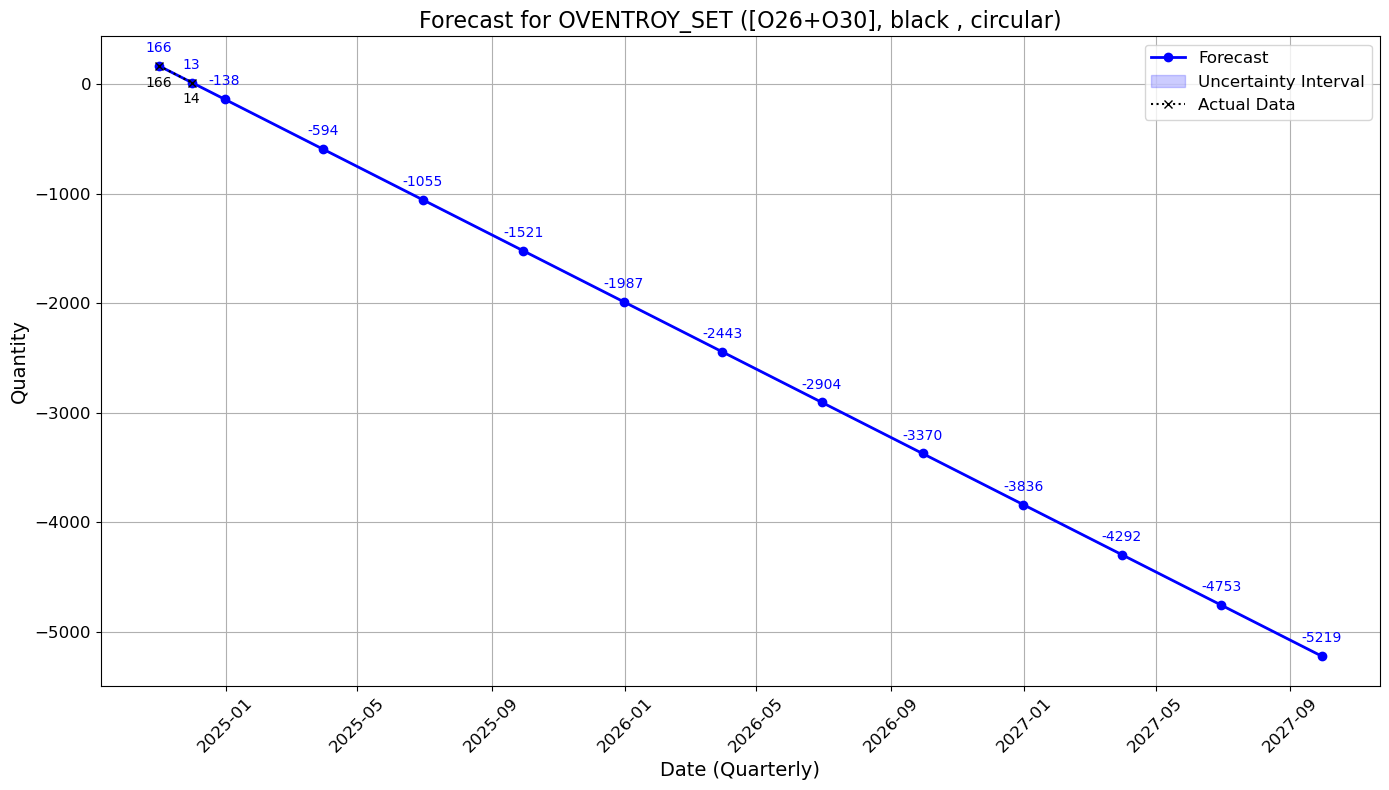

In [90]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# قراءة البيانات
df = pd.read_excel("sales 2023-2024MO.xlsx")

# تنظيف البيانات
df['Invoice date'] = pd.to_datetime(df['Invoice date'], errors='coerce')
df.dropna(subset=['Invoice date', 'Quantity', 'Item', 'size', 'color', 'shape'], inplace=True)

# جمع إجمالي المبيعات حسب السمات
grouped_data = df.groupby(
    [df['Invoice date'].dt.to_period('M'), 'Item', 'size', 'color', 'shape']
)['Quantity'].sum().reset_index()

# تحويل التواريخ إلى تنسيق مناسب
grouped_data['ds'] = grouped_data['Invoice date'].dt.to_timestamp()

# إعداد ملف Excel للبيانات المنظَّمة
grouped_data.to_excel("cleaned_sales_data.xlsx", index=False)
print("تم حفظ البيانات المنظَّمة في ملف cleaned_sales_data.xlsx")

# إنشاء توقعات لكل عنصر بناءً على السمات المختلفة
all_forecasts = []

for item in grouped_data['Item'].unique():
    for size in grouped_data['size'].unique():
        for color in grouped_data['color'].unique():
            for shape in grouped_data['shape'].unique():
                # تصفية البيانات حسب العنصر والحجم واللون والشكل
                item_data = grouped_data[
                    (grouped_data['Item'] == item) &
                    (grouped_data['size'] == size) &
                    (grouped_data['color'] == color) &
                    (grouped_data['shape'] == shape)
                ]
                
                # التحقق من وجود بيانات كافية
                if len(item_data) < 2:
                    print(f"تجاهل العنصر '{item}', {size}, {color}, {shape} بسبب نقص البيانات.")
                    continue

                # إعداد البيانات للنموذج
                item_data = item_data[['ds', 'Quantity']].rename(columns={'Quantity': 'y'})
                
                # إنشاء نموذج Prophet
                model = Prophet()
                model.fit(item_data)
                
                # إنشاء بيانات مستقبلية
                future = model.make_future_dataframe(periods=12, freq='Q')  # تغيير التردد إلى ربع سنوي
                forecast = model.predict(future)

                # دمج التوقعات مع البيانات الأصلية
                forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
                forecast = forecast.merge(item_data, on='ds', how='left')

                # إضافة السمات للأعمدة
                forecast['Item'] = item
                forecast['size'] = size
                forecast['color'] = color
                forecast['shape'] = shape

                # إضافة التوقعات لقائمة التجميع
                all_forecasts.append(forecast)

                # رسم التوقعات
                plt.figure(figsize=(14, 8))  # ضبط الأبعاد لتناسب البيانات
                plt.plot(
                    forecast['ds'], forecast['yhat'], 
                    label='Forecast', color='blue', linewidth=2, marker='o'
                )
                plt.fill_between(
                    forecast['ds'], 
                    forecast['yhat_lower'], 
                    forecast['yhat_upper'], 
                    color='blue', alpha=0.2, label='Uncertainty Interval'
                )
                if 'y' in forecast.columns:
                    plt.plot(
                        forecast['ds'], forecast['y'], 
                        label='Actual Data', color='black', linestyle='dotted', marker='x'
                    )

                # إضافة أرقام بجانب النقاط
                for i, row in forecast.iterrows():
                    # كتابة التوقعات (Forecast)
                    plt.annotate(
                        f"{int(row['yhat'])}", 
                        (row['ds'], row['yhat']),
                        textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='blue'
                    )
                    # كتابة البيانات الفعلية (Actual Data) إن وُجدت
                    if not pd.isna(row.get('y', None)):
                        plt.annotate(
                            f"{int(row['y'])}", 
                            (row['ds'], row['y']),
                            textcoords="offset points", xytext=(0, -15), ha='center', fontsize=10, color='black'
                        )

                # إعدادات المحاور والعناوين
                plt.title(f"Forecast for {item} ({size}, {color}, {shape})", fontsize=16)
                plt.xlabel("Date (Quarterly)", fontsize=14)
                plt.ylabel("Quantity", fontsize=14)
                plt.xticks(rotation=45, fontsize=12)
                plt.yticks(fontsize=12)
                plt.legend(fontsize=12)
                plt.grid(True)

                # حفظ الرسم البياني
                plt.tight_layout()  # لتجنب تداخل العناصر
                plt.savefig(f"forecast_{item}_{size}_{color}_{shape}.png", dpi=300)
                plt.close()

# دمج جميع التوقعات في DataFrame واحد
final_forecast = pd.concat(all_forecasts, ignore_index=True)

# حفظ التوقعات النهائية في ملف Excel
final_forecast.to_excel("forecasted_sales_data_with_attributes.xlsx", index=False)
print("تم حفظ جميع التوقعات في ملف forecasted_sales_data_with_attributes.xlsx")


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# قراءة البيانات
df = pd.read_excel("sales 2023-2024MO.xlsx")

# تنظيف البيانات
df['Invoice date'] = pd.to_datetime(df['Invoice date'], errors='coerce')
df.dropna(subset=['Invoice date', 'Quantity', 'Item', 'size', 'color', 'shape'], inplace=True)

# جمع إجمالي المبيعات حسب السمات
grouped_data = df.groupby(
    [df['Invoice date'].dt.to_period('M'), 'Item', 'size', 'color', 'shape']
)['Quantity'].sum().reset_index()

# تحويل التواريخ إلى تنسيق مناسب
grouped_data['ds'] = grouped_data['Invoice date'].dt.to_timestamp()

# إعداد ملف Excel للبيانات المنظَّمة
grouped_data.to_excel("cleaned_sales_data.xlsx", index=False)
print("تم حفظ البيانات المنظَّمة في ملف cleaned_sales_data.xlsx")

# إنشاء توقعات لكل عنصر بناءً على السمات المختلفة
all_forecasts = []

for item in grouped_data['Item'].unique():
    for size in grouped_data['size'].unique():
        for color in grouped_data['color'].unique():
            for shape in grouped_data['shape'].unique():
                # تصفية البيانات حسب العنصر والحجم واللون والشكل
                item_data = grouped_data[
                    (grouped_data['Item'] == item) &
                    (grouped_data['size'] == size) &
                    (grouped_data['color'] == color) &
                    (grouped_data['shape'] == shape)
                ]
                
                # التحقق من وجود بيانات كافية
                if len(item_data) < 2:
                    print(f"تجاهل العنصر '{item}', {size}, {color}, {shape} بسبب نقص البيانات.")
                    continue

                # إعداد البيانات للنموذج
                item_data = item_data[['ds', 'Quantity']].rename(columns={'Quantity': 'y'})
                
                # إنشاء نموذج Prophet
                model = Prophet()
                model.fit(item_data)
                
                # إنشاء بيانات مستقبلية
                future = model.make_future_dataframe(periods=12, freq='M')
                forecast = model.predict(future)

                # دمج التوقعات مع البيانات الأصلية
                forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
                forecast = forecast.merge(item_data, on='ds', how='left')

                # إضافة السمات للأعمدة
                forecast['Item'] = item
                forecast['size'] = size
                forecast['color'] = color
                forecast['shape'] = shape

                # إضافة التوقعات لقائمة التجميع
                all_forecasts.append(forecast)

                # رسم التوقعات
                plt.figure(figsize=(14, 8))  # ضبط الأبعاد لتناسب البيانات
                plt.plot(
                    forecast['ds'], forecast['yhat'], 
                    label='Forecast', color='blue', linewidth=2, marker='o'
                )
                plt.fill_between(
                    forecast['ds'], 
                    forecast['yhat_lower'], 
                    forecast['yhat_upper'], 
                    color='blue', alpha=0.2, label='Uncertainty Interval'
                )
                if 'y' in forecast.columns:
                    plt.plot(
                        forecast['ds'], forecast['y'], 
                        label='Actual Data', color='black', linestyle='dotted', marker='x'
                    )

                # إضافة الأرقام والتواريخ على النقاط
                for i in range(len(forecast)):
                    plt.text(
                        forecast['ds'].iloc[i], forecast['yhat'].iloc[i], 
                        f"{forecast['yhat'].iloc[i]:.2f}", 
                        color='blue', fontsize=10, ha='center', va='bottom'
                    )
                    plt.text(
                        forecast['ds'].iloc[i], forecast['y'].iloc[i] if 'y' in forecast.columns else forecast['yhat'].iloc[i], 
                        f"{forecast['ds'].iloc[i].strftime('%Y-%m-%d')}", 
                        color='black', fontsize=10, ha='center', va='top'
                    )

                # إضافة نص لتوضيح أسباب الارتفاع أو الهبوط (اختياري)
                for i in range(1, len(forecast)):
                    if forecast['yhat'].iloc[i] > forecast['yhat'].iloc[i-1]:
                        plt.text(
                            forecast['ds'].iloc[i], forecast['yhat'].iloc[i] + 0.1, 
                            'ارتفاع', color='green', fontsize=12, ha='center', va='bottom'
                        )
                    elif forecast['yhat'].iloc[i] < forecast['yhat'].iloc[i-1]:
                        plt.text(
                            forecast['ds'].iloc[i], forecast['yhat'].iloc[i] - 0.1, 
                            'هبوط', color='red', fontsize=12, ha='center', va='top'
                        )

                # إعدادات المحاور والعناوين
                plt.title(f"Forecast for {item} ({size}, {color}, {shape})", fontsize=16)
                plt.xlabel("Date", fontsize=14)
                plt.ylabel("Quantity", fontsize=14)
                plt.xticks(rotation=45, fontsize=12)
                plt.yticks(fontsize=12)
                plt.legend(fontsize=12)
                plt.grid(True)

                # حفظ الرسم البياني
                plt.tight_layout()  # لتجنب تداخل العناصر
                plt.savefig(f"forecast_{item}_{size}_{color}_{shape}.png", dpi=300)
                plt.close()

# دمج جميع التوقعات في DataFrame واحد
final_forecast = pd.concat(all_forecasts, ignore_index=True)

# حفظ التوقعات النهائية في ملف Excel
final_forecast.to_excel("forecasted_sales_data_with_attributes.xlsx", index=False)
print("تم حفظ جميع التوقعات في ملف forecasted_sales_data_with_attributes.xlsx")


18:10:58 - cmdstanpy - INFO - Chain [1] start processing
18:10:58 - cmdstanpy - INFO - Chain [1] done processing


تم حفظ البيانات المنظَّمة في ملف cleaned_sales_data.xlsx


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'DISTRIBUTION_SET', DS, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', DS, beige, circular بسبب ن

تجاهل العنصر 'DISTRIBUTION_SET', F24, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', F24, black

تجاهل العنصر 'DISTRIBUTION_SET', G28, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', G28, gray, circula

تجاهل العنصر 'DISTRIBUTION_SET', O30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', O30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [O26+

تجاهل العنصر 'DISTRIBUTION_SET', P20, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P20, beige, squa

تجاهل العنصر 'DISTRIBUTION_SET', P28, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P28, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P2

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+O28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET',

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+G28+F26+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O30+G28], Burgundy, rectangular بسب

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET'

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P24+P28+F20+F22+F2

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], gray, stand بسبب 

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 

تجاهل العنصر 'DISTRIBUTION_SET', W28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', W28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', W28, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', W28, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+G28]+DS, Burgundy, square ب

تجاهل العنصر 'DISTRIBUTION_SET', Oo35, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo35, Burg

تجاهل العنصر 'DISTRIBUTION_SET', P16, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', P16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P18+P24+P28+O30+G28], black, rectangular بسبب نقص البي

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P28+F26], beige, circular بسبب نقص البيا

تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+F24], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+F24], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+F24], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P26+F24], Burgundy, 

تجاهل العنصر 'DISTRIBUTION_SET', Oo25, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', Oo25, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DIST

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+M16+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+M16+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+M16+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+M16+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+M16+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+M16+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F26+M16+O26], Burgundy, circular بسبب نقص البيانات

تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P20+P24+P30+F22+F20+F26+W28], Rose, rectangular بسبب نقص البيانات.
تجاه

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTI

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, circular بسبب نقص البيانات.
تجا

تجاهل العنصر 'DISTRIBUTION_SET', TF24, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', TF24, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUT

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28+F26+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DI

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C1

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+P28+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F24+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [F20+F24+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O28-G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+P28+F22+F28+O

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P24+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P26+P30+O26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P26+P30+O26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P26+P30+O26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P26+P30+O26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P26+P30+O26], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P26+P30+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P26+P30+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P26+P30+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P22+P26+P30+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P26+P30+F20+F24+F30+Oo30+W28+O26+O30+M16+S26+C16+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P1

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], R

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P20+P24+P30+M16+W28+TF22], beige , stand بسبب نقص البيانات.
تجاهل العنصر 

تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [Oo25+Oo35], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DIST

تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P18+P20+P24+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P

تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P30], black , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P18+P20+P24+P30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+TF20], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+TF20], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DISTRIBUTION_SET', [P16+P22+P26+P30+M16+Oo25+TF20], blac

تجاهل العنصر 'DOUBLE_GRILL', DS, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', DS, Burgundy , stand بسبب نقص

18:11:12 - cmdstanpy - INFO - Chain [1] start processing
18:11:12 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy

تجاهل العنصر 'DOUBLE_GRILL', G36, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', G36, beige , st

تجاهل العنصر 'DOUBLE_GRILL', F24, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F24, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE

تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24], Rose , rectangular بسبب نقص البيانات.
تجاهل

تجاهل العنصر 'DOUBLE_GRILL', O30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', O30

تجاهل العنصر 'DOUBLE_GRILL', P20, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P20, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P22, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P22, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P22, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_

تجاهل العنصر 'DOUBLE_GRILL', S26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', S26

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+O26+G28], Rose, square بسبب نقص البي

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F22+F26+O26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P1

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F26+Oo30+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنص

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], black , stand بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], beige, stand بسبب نقص البيانات.
تجاهل الع

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F24], Rose , rectangular بسبب نق

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+G28]+DS

تجاهل العنصر 'DOUBLE_GRILL', Oo35, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', Oo35, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL',

تجاهل العنصر 'DOUBLE_GRILL', P16, black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P16, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P16, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P16, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', P16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'DOUBLE_GRILL', F30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', F30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F24], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F24], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F

تجاهل العنصر 'DOUBLE_GRILL', C18, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', C18, black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOU

تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P24+P28+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P2

تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P22+P26+P30+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL'

تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30]

تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GR

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P28+P3

تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+

تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F26+M

تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P16+P22+P24+P28+O30+F26+Oo30+G28+M16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_

تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+P26+G

تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F26], black, circul

تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+P28+F22+F26+O

تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P24+G28], beige, square بسبب نقص البيانات.
تج

تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P22+P26+P30+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL'

تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+S26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P30+W28+M16+TF22+F20+

تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P20+P18+P24+P28+F24+O26], beige, circular بسبب نقص البيا

تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P30+M16+W28+TF22], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P1

تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [F20+F24+F28], Burgundy , sta

تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P18+P20+P24+F26], Rose, circular بسبب نقص البيانات.
تجاهل

تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P22+P28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P22+P28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P22+P28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P22+P28], black , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P22+P28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P22+P28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P22+P28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P22+P28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P24+P30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P18+P20+P

تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24+P28+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'DOUBLE_GRILL', [P16+P20+P24

18:11:29 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', G36, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', G36, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', G36, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', G36, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', G36, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', G36, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, black, rectangular بسبب نقص البيانات.


18:11:29 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:31 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F20, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Burgundy, rectangular بسبب نقص البيانات.


18:11:32 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:34 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose, rectangular بسبب نقص البيانات.


18:11:34 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:36 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F20, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, beige, rectangular بسبب نقص البيانات.


18:11:36 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:38 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F20, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, gray, rectangular بسبب نقص البيانات.


18:11:38 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:40 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F20, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, beige , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:41 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F20, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Burgundy , rectangular بسبب نقص البيانات.


18:11:43 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:45 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F20, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, black , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:46 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F20, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F20, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, black, rectangular بسبب نقص البيانات.


18:11:46 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:48 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F22, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Burgundy, rectangular بسبب نقص البيانات.


18:11:48 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:49 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F22, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Rose, rectangular بسبب نقص البيانات.


18:11:50 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:51 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F22, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, beige, rectangular بسبب نقص البيانات.


18:11:51 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:53 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F22, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, gray, rectangular بسبب نقص البيانات.


18:11:53 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:54 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F22, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, beige , rectangular بسبب نقص البيانات.


18:11:56 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:57 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F22, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Burgundy , rectangular بسبب نقص البيانات.


18:11:57 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:58 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F22, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, black , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:11:59 - cmdstanpy - INFO - Chain [1] start processing
18:11:59 - cmdstanpy - INFO - C

تجاهل العنصر 'FRY PAN', F22, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F22, Rose , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:01 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, black, rectangular بسبب نقص البيانات.


18:12:01 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:03 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F24, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Burgundy, rectangular بسبب نقص البيانات.


18:12:03 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:04 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Rose, rectangular بسبب نقص البيانات.


18:12:04 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:06 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F24, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, beige, rectangular بسبب نقص البيانات.


18:12:06 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:07 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F24, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, gray, rectangular بسبب نقص البيانات.


18:12:07 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:09 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F24, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, beige , rectangular بسبب نقص البيانات.


18:12:09 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:10 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F24, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Burgundy , rectangular بسبب نقص البيانات.


18:12:12 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:13 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F24, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, black , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:14 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F24, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F24, Rose , rectangular بسبب نقص البيانات.


18:12:15 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:17 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F24, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, black, rectangular بسبب نقص البيانات.


18:12:17 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:18 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Burgundy, rectangular بسبب نقص البيانات.


18:12:20 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:21 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose, rectangular بسبب نقص البيانات.


18:12:23 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:24 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F26, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, beige, rectangular بسبب نقص البيانات.


18:12:26 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:27 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F26, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, gray, rectangular بسبب نقص البيانات.


18:12:29 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:30 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F26, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, beige , rectangular بسبب نقص البيانات.


18:12:32 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:34 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F26, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Burgundy , rectangular بسبب نقص البيانات.


18:12:37 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:38 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F26, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, black , rectangular بسبب نقص البيانات.


18:12:39 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:40 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F26, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F26, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, black, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:41 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F28, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Burgundy, rectangular بسبب نقص البيانات.


18:12:41 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:43 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F28, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Rose, rectangular بسبب نقص البيانات.


18:12:43 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:44 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, beige, rectangular بسبب نقص البيانات.


18:12:44 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:46 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F28, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, gray, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:48 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F28, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, beige , rectangular بسبب نقص البيانات.


18:12:50 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:51 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Burgundy , rectangular بسبب نقص البيانات.


18:12:53 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:54 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRY PAN', F28, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, black , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:12:56 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRY PAN', F28, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F28, Rose , rectangular بسبب نقص البيانات.


18:12:56 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'FRY PAN', F28, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F22+F26], beige, st

تجاهل العنصر 'FRY PAN', Oo30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Oo30, black , circular بسبب نقص البيانات.
تجاهل العنصر

تجاهل العنصر 'FRY PAN', Pizza 26, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 26, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P18, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P18, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P18, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P18, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P18, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P18, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P18, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P18, Burgundy, square بسبب نقص البيا

تجاهل العنصر 'FRY PAN', P26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P26, beige , square بسبب نق

تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+O26

تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+F26+O26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, rectangular بسبب نقص البيانات.
تجاهل 

تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P

تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28], gray, stand بسبب نق

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN'

تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+G28]+DS, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FR

تجاهل العنصر 'FRY PAN', Pizza 24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', Pizza 24, beige , circ

تجاهل العنصر 'FRY PAN', P16, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', P16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P18+P24+P28+O30+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل ال

18:13:02 - cmdstanpy - INFO - Chain [1] start processing
18:13:02 - cmdstanpy - INFO - Chain [1] done processing


تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F26+G28+M16+S26+O30], Rose , rectangular بسبب نقص البيانات.
تجاه

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:04 - cmdstanpy - INFO - Chain [1] start processing
18:13:04 - cmdstanpy - INFO - C

تجاهل العنصر 'FRY PAN', F30, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:05 - cmdstanpy - INFO - Chain [1] start processing
18:13:05 - cmdstanpy - INFO - C

تجاهل العنصر 'FRY PAN', F30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Rose, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:06 - cmdstanpy - INFO - Chain [1] start processing
18:13:06 - cmdstanpy - INFO - C

تجاهل العنصر 'FRY PAN', F30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:08 - cmdstanpy - INFO - Chain [1] start processing
18:13:08 - cmdstanpy - INFO - C

تجاهل العنصر 'FRY PAN', F30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, gray, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:09 - cmdstanpy - INFO - Chain [1] start processing
18:13:09 - cmdstanpy - INFO - C

تجاهل العنصر 'FRY PAN', F30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, black , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'FRY PAN', F30, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', F30, Rose , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'FRY PAN', F30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P28+O26+G28], Rose, circular بسبب ن

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'FRY PAN', C18, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', C18, black

تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16

تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P20+P22+P26+P30+F26+O30]

تجاهل العنصر 'FRY PAN', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Burgundy, circular بسبب نقص البيانات.
تج

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], gray, st

تجاهل العنصر 'FRY PAN', TF30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', TF

تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+P28+F26+G28+M16+S26+O30], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', 

تجاهل العنصر 'FRY PAN', [F20+F24+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [F20+F24+F26], 

تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P24+P28+F22+F28+O28-G28], gray, circu

تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P22+P24+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26+P30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26+P30], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26+P30], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26+P30], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26+P30], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26+P30], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26+P30], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26+P30], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26+P30], Rose, stand بسب

تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F24+F30+Oo30+W28+O26+O30+M16+S26+C16+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F24+F30+Oo30+W28+O26+O30+M16+S26+C16+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F24+F30+Oo30+W28+O26+O30+M16+S26+C16+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F24+F30+Oo30+W28+O26+O30+M16+S26+C16+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F24+F30+Oo30+W28+O26+O30+M16+S26+C16+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F24+F30+Oo30+W28+O26+O30+M16+S26+C16+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F24+F30+Oo30+W28+O26+O30+M16+S26+C16+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F24+F30+Oo30+W28+O26+O30+M16+S26+C16+G28], Burgundy , c

تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', 

تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P22+P24+P30+F20+F24+

تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P18+P20+P22+P24+P26+P28], gray, square ب

تجاهل العنصر 'FRY PAN', [P16+P20+P26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN',

تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P18+P20+P24+P30], black , square بسبب نقص البيانات

تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRY PAN', [P16+P20+P24+P28+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', DS, beige, stand 

تجاهل العنصر 'FRYPAN_SET', F22, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F22, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F22, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F24, Rose, circular بسبب نقص ال

18:13:20 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', F28, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', F28, Rose , circu

18:13:21 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:22 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:24 - cmdstanpy - INFO - Chain [1] start processing
18:13:24 - cmdstanpy - INFO - C

تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Rose, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:25 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige, rectangular بسبب نقص البيانات.


18:13:25 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:27 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], gray, rectangular بسبب نقص البيانات.


18:13:27 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:28 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F22+F26], black , square بسب

18:13:28 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:30 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRYPAN_SET', [F20+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy, rectangular بسبب نقص البيانات.


18:13:30 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:32 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:33 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige, rectangular بسبب نقص البيانات.


18:13:33 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:34 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], gray, rectangular بسبب نقص البيانات.


18:13:34 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:36 - cmdstanpy - INFO - Ch

تجاهل العنصر 'FRYPAN_SET', [F20+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:37 - cmdstanpy - INFO - Chain [1] start processing
18:13:37 - cmdstanpy - INFO - C

تجاهل العنصر 'FRYPAN_SET', [F20+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:39 - cmdstanpy - INFO - Chain [1] start processing
18:13:39 - cmdstanpy - INFO - C

تجاهل العنصر 'FRYPAN_SET', [F20+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], black , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:40 - cmdstanpy - INFO - Chain [1] start processing
18:13:40 - cmdstanpy - INFO - C

تجاهل العنصر 'FRYPAN_SET', [F20+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'FRYPAN_SET', [F20+F24], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', G28, beige, rectangular بسبب نقص

تجاهل العنصر 'FRYPAN_SET', O26, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O26, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O30, Rose, rectangular بسبب نقص ال

تجاهل العنصر 'FRYPAN_SET', P18, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P20, beige, rectangular بسبب نقص البيا

تجاهل العنصر 'FRYPAN_SET', P28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P28, Burgundy , circular بسبب نقص

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+O28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+O28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+O28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+O28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+O28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+O28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+O28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F26+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F26+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F26+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F26+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+G28+F26+O26], Burgundy, 

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], b

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige, square 

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F26], beige , square بسبب 

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+G28]+DS, gray, square بسبب نقص البيانات.
تجاهل 

تجاهل العنصر 'FRYPAN_SET', Oo35, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo35, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', O

تجاهل العنصر 'FRYPAN_SET', P16, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', P16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+O30+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+O30+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+O30+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+O30+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+O30+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P18+P24+P28+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P28+G28], black, recta

تجاهل العنصر 'FRYPAN_SET', [P20+P24+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+F24], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+F24], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+F24], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+P26+F24], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+P26+F24], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+P26+F24], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+P26+F24], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P20+P24+P26+F24], Burgundy, stand 

تجاهل العنصر 'FRYPAN_SET', Oo25, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', Oo25, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F22], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F22], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F22], black, circular بسبب نقص البيان

تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+W28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+W28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+W28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+W28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+W28], Burgundy, rectangular بسبب نقص البيانات.
تج

تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+F30+C18+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+F30+C18+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+F30+C18+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+F30+C18+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P22+P26+P30+F30+C18+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P30+F30+W28+C18+Oo30+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P1

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], Burgundy

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+P30+F

تجاهل العنصر 'FRYPAN_SET', TF26, black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF26, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', TF30, Burgundy, c

تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], beige, circ

تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , square بسبب نقص البيانات.
تجاه

تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+P28+F26], Burgund

18:13:51 - cmdstanpy - INFO - Chain [1] start processing
18:13:51 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy

تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige, rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:13:54 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Burgundy , square بسبب نقص ا

18:13:56 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo30+Oo35], Burgundy, square بسبب نقص البيانات.
تجاهل العن

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P28+F22+F28+O28-G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYP

تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P24+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET',

تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P22+P26+P30+O26], Burgundy , rectangul

تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P26+P30+F20+F22+O26+Oo30+G28+M16+S26+TF20+W28], Burgundy, square بسبب نقص البيانات.
تجاهل ال

تجاهل العنصر 'FRYPAN_SET', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+P26+P30+F20+F24+F30+G28+O26+M16+Oo25+W28], black, circular بسبب نقص البي

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P22+P24+P26+P28], Burgundy , square بسبب نقص البيانات.
تجاهل ا

18:14:00 - cmdstanpy - INFO - Chain [1] start processing
18:14:01 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy

تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], black , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [F20+F24+F28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], black, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], black, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], black, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [Oo25+Oo35], Burgundy, square بسبب نقص البيانات.
تجاهل العن

تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P18+P20+P24+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'FR

تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'FRYPAN_SET', [P16+P20+P24+P28+F24], beige, squa

تجاهل العنصر 'GRILL', F20, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', F20, Rose , rectangular بسبب نقص البي

تجاهل العنصر 'GRILL', [F20+F22+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [F20+F22+F26], Burgundy , rectangular بسبب نقص 

18:14:06 - cmdstanpy - INFO - Chain [1] start processing
18:14:06 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy

تجاهل العنصر 'GRILL', G28, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Burgundy, circular بسبب نقص البيانات.


18:14:08 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:09 - cmdstanpy - INFO - Ch

تجاهل العنصر 'GRILL', G28, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Rose, circular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:11 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'GRILL', G28, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, beige, circular بسبب نقص البيانات.


18:14:11 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:12 - cmdstanpy - INFO - Ch

تجاهل العنصر 'GRILL', G28, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, gray, circular بسبب نقص البيانات.


18:14:13 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:14 - cmdstanpy - INFO - Ch

تجاهل العنصر 'GRILL', G28, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, beige , circular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:16 - cmdstanpy - INFO - Chain [1] start processing
18:14:16 - cmdstanpy - INFO - C

تجاهل العنصر 'GRILL', G28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Burgundy , circular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:17 - cmdstanpy - INFO - Chain [1] start processing
18:14:17 - cmdstanpy - INFO - C

تجاهل العنصر 'GRILL', G28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, black , circular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:18 - cmdstanpy - INFO - Chain [1] start processing
18:14:18 - cmdstanpy - INFO - C

تجاهل العنصر 'GRILL', G28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', G28, Rose , circular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'GRILL', M16, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', M16, beige, square بسبب نقص البيانات.
تجاهل ال

تجاهل العنصر 'GRILL', [O26+O30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [O26+O30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Pizza 26, blac

تجاهل العنصر 'GRILL', P24, black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P24, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P26, Rose, rectangular بسبب نقص البيانات.
تجاه

تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+O26+G28], Burgundy , square ب

تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P20+P18+P24+P28+F26+O26], black , 

تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26+M16+Oo30+O30+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P

تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36

تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F22+F26+O26+G28+M16+S26+DS], gray, rectangular

تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24+O26], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24+O26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24+O26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24+O26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24+O26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GR

تجاهل العنصر 'GRILL', W28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', W28, black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', W28, black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', W28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', W28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', W28, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', W28, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+G28]+DS, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+G28]+DS, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+G28]+DS, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+G28]+DS, black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+G28]+DS, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+G28]+DS, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+G28]+DS, Burgundy, circular بسبب نقص البيانات.
تجاه

تجاهل العنصر 'GRILL', Oo35, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', Oo35, beige , stand بسبب نقص البيانات

تجاهل العنصر 'GRILL', P16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', P16, beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL'

تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P22+P28+O26+G28], beige , square بسبب نقص البيانات

تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+P28

تجاهل العنصر 'GRILL', C16, black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C16, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C16, black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C16, black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C16, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C16, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C16, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C18, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C18, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C18, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C18, black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C18, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C18, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C18, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', C18, Burgundy, square بسبب نقص البيانات.


تجاهل العنصر 'GRILL', [P18+P20+P24+F22], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F22], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F22], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F22], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F22], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F22], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F22], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F22], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P20+P24+F22], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+F26], black, square بسبب نقص البيان

تجاهل العنصر 'GRILL', [P16+P22+P26+W28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+W28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+W28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+W28], Ro

تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+F30+C18+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GR

تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P16+P24+P28+O30+F26+Oo30+G28+M16+C16], Rose, square بسبب نق

تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P30+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF24, black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', TF24, Burgundy, circular بسبب نقص 

تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+O26+G28], beige , square بسبب نقص البيانات

تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+G28+M16], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P28+F20+F22+F24+O26+

تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+P28+F24], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P

تجاهل العنصر 'GRILL', [Oo30+Oo35], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [Oo30+Oo35], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P24+P28+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GR

تجاهل العنصر 'GRILL', [P18+P22+P24+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P24+F24], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P

تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P24+P28+G28], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P30+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P18+P22+P26+P

تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P22+P24+P30+W28+M16+TF22+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', 

تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S26+G28+M16], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P22+P24+P30+F20+F24+F30+S

تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28

تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P22+P26+P30+M16+Oo25+Tf20], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'G

تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18+P20+P22+P28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P18

تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'GRILL', [P16+P20+P24+P28+F24], gray,

تجاهل العنصر 'MILK POT', F20, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20, gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F20,

تجاهل العنصر 'MILK POT', F28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F28, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F28, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [F20+F22+F26], Rose, ci

18:14:34 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'MILK POT', G28, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', G28, Rose , square بسبب نقص البيانات.
تجاهل ا

18:14:34 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:35 - cmdstanpy - INFO - Ch

تجاهل العنصر 'MILK POT', M16, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Burgundy, rectangular بسبب نقص البيانات.


18:14:36 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:37 - cmdstanpy - INFO - Ch

تجاهل العنصر 'MILK POT', M16, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Rose, rectangular بسبب نقص البيانات.


18:14:37 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:39 - cmdstanpy - INFO - Ch

تجاهل العنصر 'MILK POT', M16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, beige, rectangular بسبب نقص البيانات.


18:14:39 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:40 - cmdstanpy - INFO - Ch

تجاهل العنصر 'MILK POT', M16, beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, gray, rectangular بسبب نقص البيانات.


18:14:41 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:42 - cmdstanpy - INFO - Ch

تجاهل العنصر 'MILK POT', M16, gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, beige , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:44 - cmdstanpy - INFO - Chain [1] start processing
18:14:44 - cmdstanpy - INFO - C

تجاهل العنصر 'MILK POT', M16, beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Burgundy , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:45 - cmdstanpy - INFO - Chain [1] start processing
18:14:45 - cmdstanpy - INFO - C

تجاهل العنصر 'MILK POT', M16, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, black , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:14:46 - cmdstanpy - INFO - Chain [1] start processing
18:14:46 - cmdstanpy - INFO - C

تجاهل العنصر 'MILK POT', M16, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', M16, Rose , rectangular بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'MILK POT', M16, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Oo30, beige, rectangular بسبب نقص البيانات.
تجاهل العنص

تجاهل العنصر 'MILK POT', Pizza 26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 26, gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza

تجاهل العنصر 'MILK POT', P22, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P22, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P24, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT

تجاهل العنصر 'MILK POT', S30, black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', S30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT'

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+O26+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P1

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P2

تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+O30+F26+Oo30+G28+M16], B

تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P24+P28+F20+F22+O26+F24+G36+W28+Oo30], black , rec

تجاهل العنصر 'MILK POT', [P18+P20+P24+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F24], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F24], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F24], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28], Burgundy, 

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+G28], Burgundy , rectangular بسبب نقص البيانات.
تج

تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+G28]+DS, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [

تجاهل العنصر 'MILK POT', Pizza 24, black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', Pizza 24, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK

تجاهل العنصر 'MILK POT', P16, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', P16, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر '

تجاهل العنصر 'MILK POT', F30, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', F30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+O26+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+O26+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+O26+G28], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+O26+G28], black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+O26+G28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+O26+G28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+O26+G28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P28+O26+G28], Burgundy, 

تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P26+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F24], black, stand بسبب نقص البي

تجاهل العنصر 'MILK POT', C16, black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, black, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', C16, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT'

تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+F22], beige , rectangular 

تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+W28], gray, 

تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P24+P30+F22+F20+F26+W28], beige , circular بسبب نقص البيانات.
تجاه

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+F20+F24+M16+Oo30+O30], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+F22+Oo25+F24+O26+G28+C16

تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+P30+F20+F24+F30+G28+O26+M16+Oo30+W28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P24+P28+P30+F20+F24+F3

تجاهل العنصر 'MILK POT', TF30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', TF30, Rose , square بسبب نقص ال

تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26+M16+Oo30+O30+G28], Burgundy , rectangular بسبب نقص البيان

تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P20+P22+P26+P30+F20+Oo25+F24+O26+G28+C16], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P

تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F26], black , stand بسبب نقص ال

تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+O26+G28], 

تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P22+P24+P28+F22+F26+O30+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P18+P2

تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P24+P28+F24], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK

تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P24+P30+C18+F30], black , square بسبب 

تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+C18], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+C18], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+C18], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+C18], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+C18], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+C18], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+C18], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+C18], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+C18], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F24+O26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F24+O26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P20+P18+P24+P28+F24+O26], black, circular بسبب نقص 

تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P24+P28+F26], beige, square بسبب نقص البيانات.
تج

تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+Tf20], black , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+Tf20], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+Tf20], black , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+Tf20], black , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+Tf20], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+Tf20], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+Tf20], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P22+P26+P30+M16+Oo25+Tf20], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P26], black, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P26], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P20+P26], black, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P

تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], beige, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], gray, square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], beige , square بسبب نقص البيانات.
تجاهل العنصر 'MILK POT', [P16+P18+P20+P24+P30], Burgundy , stand بسبب نقص البيانات.
تجاهل 

تجاهل العنصر 'OBLONG_OVENTRAY', DS, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', DS, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', DS, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', DS, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G36, Rose, rectangular بسبب نقص ال

تجاهل العنصر 'OBLONG_OVENTRAY', F24, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F24, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', F26, black, circula

تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [F20+F24], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', G28, black, stand 

18:15:03 - cmdstanpy - INFO - Chain [1] start processing
18:15:03 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy

تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy, stand بسبب نقص البيانات.


18:15:04 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:06 - cmdstanpy - INFO - Ch

تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose, stand بسبب نقص البيانات.


18:15:06 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:07 - cmdstanpy - INFO - Ch

تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige, stand بسبب نقص البيانات.


18:15:07 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:09 - cmdstanpy - INFO - Ch

تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, gray, stand بسبب نقص البيانات.


18:15:09 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:10 - cmdstanpy - INFO - Ch

تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige , stand بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:12 - cmdstanpy - INFO - Chain [1] start processing
18:15:12 - cmdstanpy - INFO - C

تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy , stand بسبب نقص البيانات.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:13 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black , stand بسبب نقص البيانات.


18:15:13 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:15 - cmdstanpy - INFO - Ch

تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose , stand بسبب نقص البيانات.


18:15:15 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo30, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', O26, Rose, square بسبب نقص 

تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 26, Rose , stand بسب

تجاهل العنصر 'OBLONG_OVENTRAY', P24, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P24, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', P26, black, rectangul

تجاهل العنصر 'OBLONG_OVENTRAY', S30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', S30, Rose , recta

تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], Burgundy, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], Burgundy, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P20+P18+P24+P28+F26+O26

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26+Oo30+O26+G28

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F20+F24+O26+G28+M16+S26+DS], beige , rectangular بسبب 

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], beige , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], Burgundy , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], Burgundy , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], Burgundy , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], Burgundy , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+F24], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26], black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26], black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26], black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26], black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26], Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26], Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26], Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+F26], Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+G28], black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+G28], black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+P28+G28], black, circular بسبب نقص البيانات.
تجاهل العن

تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+G28]+DS, black , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+G28]+DS, black , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+G28]+DS, black , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+G28]+DS, black , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+G28]+DS, Rose , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+G28]+DS, Rose , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+G28]+DS, Rose , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', [P18+P20+P24+G28]+DS, Rose , square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 28, black, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 28, black, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 28, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Pizza 28, black, square ب

18:15:20 - cmdstanpy - INFO - Chain [1] start processing


تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, beige, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, beige, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, gray, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, gray, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, gray, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, gray, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, beige , stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, beige , rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, beige , circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Ts30, beige , square بسبب نق

18:15:20 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:22 - cmdstanpy - INFO - Ch

تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, black, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, black, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Burgundy, stand بسبب نقص البيانات.


18:15:22 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:23 - cmdstanpy - INFO - Ch

تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Burgundy, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Burgundy, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose, stand بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose, rectangular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, Rose, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, beige, stand بسبب نقص البيانات.


18:15:23 - cmdstanpy - INFO - Chain [1] done processing
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
18:15:25 - cmdstanpy - INFO - Ch

تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, beige, circular بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, beige, square بسبب نقص البيانات.
تجاهل العنصر 'OBLONG_OVENTRAY', Oo35, gray, stand بسبب نقص البيانات.


18:15:25 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
import pandas as pd
from prophet import Prophet

# قراءة البيانات
df = pd.read_excel("sales 2023-2024MO.xlsx")

# تنظيف البيانات
df['Invoice date'] = pd.to_datetime(df['Invoice date'], errors='coerce')
df.dropna(subset=['Invoice date', 'Quantity', 'Item', 'size', 'color', 'shape'], inplace=True)

# جمع إجمالي المبيعات حسب السمات
grouped_data = df.groupby(
    [df['Invoice date'].dt.to_period('M'), 'Item', 'size', 'color', 'shape']
)['Quantity'].sum().reset_index()

# تحويل التواريخ إلى تنسيق مناسب
grouped_data['ds'] = grouped_data['Invoice date'].dt.to_timestamp()

# إعداد ملف Excel للبيانات المنظَّمة
grouped_data.to_excel("cleaned_sales_data.xlsx", index=False)
print("تم حفظ البيانات المنظَّمة في ملف cleaned_sales_data.xlsx")

# إنشاء توقعات لكل عنصر بناءً على السمات المختلفة
all_forecasts = []

for item in grouped_data['Item'].unique():
    for size in grouped_data['size'].unique():
        for color in grouped_data['color'].unique():
            for shape in grouped_data['shape'].unique():
                # تصفية البيانات حسب العنصر والحجم واللون والشكل
                item_data = grouped_data[
                    (grouped_data['Item'] == item) &
                    (grouped_data['size'] == size) &
                    (grouped_data['color'] == color) &
                    (grouped_data['shape'] == shape)
                ]
                
                # التحقق من وجود بيانات كافية
                if len(item_data) < 2:
                    print(f"تجاهل العنصر '{item}', {size}, {color}, {shape} بسبب نقص البيانات.")
                    continue

                # إعداد البيانات للنموذج
                item_data = item_data[['ds', 'Quantity']].rename(columns={'Quantity': 'y'})
                
                # إنشاء نموذج Prophet
                model = Prophet()
                model.fit(item_data)
                
                # إنشاء بيانات مستقبلية
                future = model.make_future_dataframe(periods=12, freq='M')
                forecast = model.predict(future)

                # دمج التوقعات مع البيانات الأصلية
                forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
                forecast = forecast.merge(item_data, on='ds', how='left')

                # إضافة السمات للأعمدة
                forecast['Item'] = item
                forecast['size'] = size
                forecast['color'] = color
                forecast['shape'] = shape

                # حساب الفروق وكتابة الأسباب
                forecast['Difference'] = forecast['y'] - forecast['yhat']
                forecast['Reason'] = forecast.apply(
                    lambda row: (
                        f"ارتفاع: الطلب الفعلي ({row['y']}) أعلى من المتوقع ({row['yhat']:.2f})."
                        if row['Difference'] > 0 else
                        f"هبوط: الطلب الفعلي ({row['y']}) أقل من المتوقع ({row['yhat']:.2f})."
                        if row['Difference'] < 0 else
                        "ثبات: الطلب الفعلي مطابق للتوقع."
                    ) if not pd.isna(row['y']) else "لا توجد بيانات فعلية لتقييم السبب.",
                    axis=1
                )

                # ملخص الصعود والهبوط
                forecast['Summary'] = forecast.apply(
                    lambda row: (
                        f"التاريخ: {row['ds'].strftime('%Y-%m-%d')}, {row['Reason']}"
                    ),
                    axis=1
                )

                # إضافة التوقعات لقائمة التجميع
                all_forecasts.append(forecast)

# دمج جميع التوقعات في DataFrame واحد
final_forecast = pd.concat(all_forecasts, ignore_index=True)

# حفظ التوقعات النهائية في ملف Excel
final_forecast.to_excel("forecasted_sales_data_with_summary.xlsx", index=False)
print("تم حفظ جميع التوقعات في ملف forecasted_sales_data_with_summary.xlsx")
